In [31]:
!pip install numpy
!pip install opencv-python

In [32]:
!pip install argparse

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [37]:
!python yolo.py --image /content/cat.jpg

Traceback (most recent call last):
  File "/content/yolo.py", line 48, in <module>
    LABELS = open(labelsPath).read().strip().split("\n")
FileNotFoundError: [Errno 2] No such file or directory: 'yolo-coco\\coco.names'


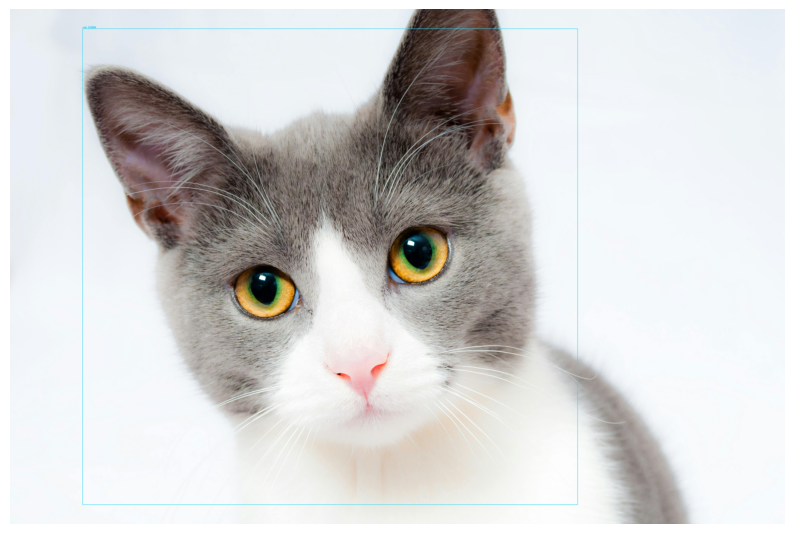

In [40]:
# importing the necessary packages
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Set your image path and parameters directly
image_path = "/content/cat.jpg"  # Specify your image path here
confidence_threshold = 0.5       # Minimum probability to filter weak detections
nms_threshold = 0.3              # Threshold for non-maxima suppression

# Load the COCO class labels YOLO model was trained on
labelsPath = '/content/coco.names'
LABELS = open(labelsPath).read().strip().split("\n")

# Initialize a list of colors to represent each possible class label
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# Paths to the YOLO weights and model configuration
weightsPath = '/content/yolov3.weights'
configPath = '/content/yolov3.cfg'

# Load the YOLO object detector trained on COCO dataset (80 classes)
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

# Load the input image and grab its spatial dimensions
image = cv2.imread(image_path)
(H, W) = image.shape[:2]

# Determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
layerOutputs = net.forward(ln)

# Initialize lists of detected bounding boxes, confidences, and class IDs
boxes = []
confidences = []
classIDs = []

# Loop over each of the layer outputs
for output in layerOutputs:
    # Loop over each of the detections
    for detection in output:
        # Extract the class ID and confidence (probability) of the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]

        # Filter out weak predictions by ensuring the detected
        # probability is greater than the minimum confidence
        if confidence > confidence_threshold:
            # Scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the width and height of the box
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # Use the center (x, y)-coordinates to derive the top and
            # left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Update the list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

# Apply non-maxima suppression to suppress weak, overlapping bounding boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)

# Ensure at least one detection exists
if len(idxs) > 0:
    # Loop over the indexes we are keeping
    for i in idxs.flatten():
        # Extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        # Draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the output image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Hide axes
plt.show()


In [28]:
!python yolo.py --image /content/ipl.png

Traceback (most recent call last):
  File "/content/yolo.py", line 48, in <module>
    LABELS = open(labelsPath).read().strip().split("\n")
FileNotFoundError: [Errno 2] No such file or directory: 'yolo-coco\\coco.names'


In [29]:
labelsPath = '/content/coco.names'
weightsPath = '/content/yolov3.weights'
configPath = '/content/yolov3.cfg'


In [30]:
!python yolo.py --image /content/ipl.png

Traceback (most recent call last):
  File "/content/yolo.py", line 48, in <module>
    LABELS = open(labelsPath).read().strip().split("\n")
FileNotFoundError: [Errno 2] No such file or directory: 'yolo-coco\\coco.names'


In [39]:
!python yolo.py --image /content/cat.jpg

Traceback (most recent call last):
  File "/content/yolo.py", line 48, in <module>
    LABELS = open(labelsPath).read().strip().split("\n")
FileNotFoundError: [Errno 2] No such file or directory: 'yolo-coco\\coco.names'
